# Map projections, reference systems and other geospatial nomenclature introduction

This introductory text is modified from a tutorial on working with geospatial data using the library ```cartopy``` that was presented at the 2018 Scipy conference by Phileas Elson (lots of great things to learn in this tutorial if you want to dig into it at some point):

https://youtu.be/AmidIx6Jmn8

https://github.com/SciTools/cartopy-tutorial

The purpose of this introduction is to give you a bit of a background on map projections, reference systems and other geospatial terms. This will help you to:
 
 * choose map projections that are appropriate for plotting data
 * understand the terms used in the ```cartopy``` functions which is a function library we will use for plotting geospatial data

# The world *is not* flat / 2D (sorry flat-Earthers)

<img src="./figures/azim-eq.png" style="max-height: 55vh; margin-left: auto; margin-right: auto;">

"Azimuthal equidistant projections of the sphere ... have been co-opted as images of the flat Earth model, depicting Antarctica as an ice wall surrounding a disk-shaped Earth." ([Wikipedia: Flat Earth](https://en.wikipedia.org/wiki/Flat_Earth#Flat_Earth_Society))

## Most of our media for visualization *are* flat

Our two most common media are flat:

 * Paper
 * Screen

### But there are *a few* that aren't...

For example:

 * 3D rendering engine (the engine is then typically responsible for projecting the data to 2D for presentation to screen)
 * A Spherical Projector...


## [Map] Projections: Taking us from spherical to flat

A map projection (or more commonly refered to as just "projection") is:

> a systematic transformation of the latitudes and longitudes of locations from the surface of a sphere or an ellipsoid into locations on a plane. [[Wikipedia: Map projection](https://en.wikipedia.org/wiki/Map_projection)].

## The major problem with map projections

<img src="./figures/orange_peel.jpg" style="margin-left: auto; margin-right: auto;">

 * The surface of a sphere is topologically different to a 2D surface, therefore we *have* to cut the sphere *somewhere*
 * A sphere's surface cannot be represented on a plane without distortion.

### Different projections

We are going to use the function library `cartopy` to make maps. `cartopy`  supports a number of different map projections which enable the 3 dimensional surface of Earth to be shown in 2 dimensions on our computer screens. I (Nick Swanson-Hysell) like the Robinson projection -- you can see what the says about me by referring to this comic:

<img src="./figures/map_projections.png" style="margin-left: auto; margin-right: auto;">

Check out the list of projections supported by `cartopy` https://scitools.org.uk/cartopy/docs/latest/crs/projections.html

### Common distortions of map projections

Properties of maps that are often not preserved:

* Area
* Shape
* Direction
* Distance
* Scale

> all ~~models~~ map projections are wrong, but some are useful - Phileas Elson (SciPy 2018)

## Classifying projections

Two common approaches:

 1. By [2D] surface classification
 2. By preserving a given property (metric)

### Projections by surface classification

![](./figures/projections.gif)

Downside: Not all projections can be classified in this way -> Leads to big "pseudo" and "other" groups.

## Surface classification: Cylindrical

<img src="./figures/cylindrical.png" style="margin-left: auto; margin-right: auto; height: 40vh;">
<p style="font-size: xx-small; float: right;">
Source: http://ayresriverblog.com/2011/05/19/the-world-is-flat/
</p>


* Meridians and paralells are straight and perpendicular.


## Surface classification: Azimuthal

<img src="./figures/azimuthal.png" style="margin-left: auto; margin-right: auto; height: 40vh;">
<p style="font-size: xx-small; float: right;">
Source: http://ayresriverblog.com/2011/05/19/the-world-is-flat/
</p>


* Parallels are complete circles
* Great circles from central point are straight lines.

## Surface classification: Conic
<img src="./figures/conic.png" style="margin-left: auto; margin-right: auto; height: 40vh;">
<p style="font-size: xx-small; float: right;">
Source: http://ayresriverblog.com/2011/05/19/the-world-is-flat/
</p>

* Meridians are straight equally-spaced lines
* Parallels are circular arcs.

### Projections by preserving metric

Downside: Some projections can live in multiple groups.

## Preserving metric: Conformal

Also known as Orthomorphic.

These projections preserve angles locally. Implying that circles anywhere on the Earth's surface map to circles of *varying size* in the projected space.

Examples of conformal projections:

 * Mercator
 * Transverse Mercator
 * Stereographic
 * Lambert conformal conic

## Preserving metric: Conformal

### Use in large scale maps (zoomed in)

Often used to preserve shape to represent their physical counterpart.
Seamless online maps like OSM/Google/Bing use a Mercator projection:

> The first launch of [Google] Maps actually did not use Mercator, and streets in high latitude places like Stockholm did not meet at right angles on the map the way they do in reality. [[ref](https://productforums.google.com/d/msg/maps/A2ygEJ5eG-o/KbZr_B0h2hkJ)]

The major drawback: it is difficult to compare lengths or areas

## Preserving metric: Conformal

### Use in small scale maps (zoomed out)

Maps reflecting directions, such as an [aero]nautical chart, or whose gradients are important,
such as a weather maps, are often projected by conformal projections.

Historically, many world maps are drawn by conformal projections, but the fact that the scale of the map
varies by location makes it difficult to compare lengths or areas.
Some have gone as far as calling the Mercator projection imperialistic and racist.


## Preserving metric: Equidistant

No map projection can be universally equidistant.

Some projections preserve distance from some standard point or line.

Examples of projections that preserve distances along meridians (but not parallels):

 * Equirectangular / Plate Carree
 * Azimuthal equidistant


## Preserving metric: Equal-area


Equal-area maps preserve area measure, generally distorting shapes in order to do so.

Examples of equal area projections:
 * Albers conic
 * Eckert IV
 * Goode's homolosine
 * Lambert azimuthal equal-area
 * Lambert cylindrical equal-area
 * Sinusoidal

## Preseving metric: Compromise

Rather than perfectly preserving any metric properties, compromise
projections aim strike a balance between distortions.
These compromises are often at the cost of polar distortions.

Examples:
    
 * Miller
 * Robinson
 * Winkel Tripel

## Tissot's indicatrix

A mathematical contrivance in order to characterize local distortions of a map projection. Multiple circles (on the sphere/ellipse) of constant area are drawn on the map. By analysing the distortions, we can identify (or more often rule-out) particular preserving metrics. You can see how dramatic the distortion is in an equirectangular projection. 


<img src="./figures/tissot.platecarree.1000km.png" style="margin-left: auto; margin-right: auto;">


## Now let's make your first map!

We are going to use ```cartopy``` in conjunction with ```matplotlib``` to make maps. ```cartopy``` can transform points, lines and images into different map projections. ```matplotlib``` provides tools to visualize these projections. We will import them using the standard conventions.

In [45]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

The syntax of using these functions takes some getting used to. Here we will make a figure, create an axis object with a defined projection, and then plot coastlines and a stock image that shows elevation.

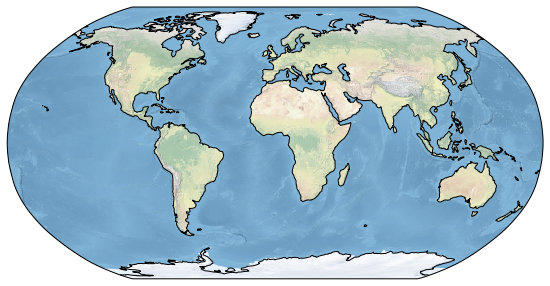

In [48]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.stock_img()
plt.show()

Let's plot the location of Berkeley on a map. First we want to assign the latitude and longitude of Berkeley to variables:

In [49]:
Berkeley_latitude = 37.8715
Berkeley_longitude = -122.2730

Now we can use the ```plt.scatter``` function to plot the location of Berkeley. We give the ```plt.scatter``` function ```Berkeley_longitude``` as the x-value, ```Berkeley_latitude``` as the y-value while also telling it to transform it into map coordinates (```transform=ccrs.Geodetic()```) and to make the point red (```color='red'```).

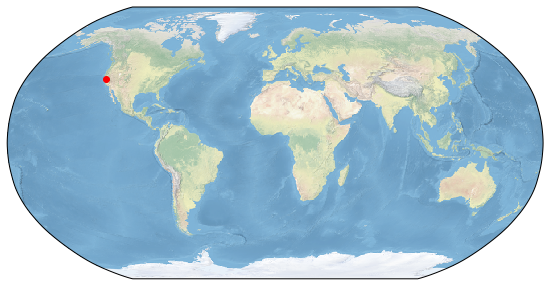

In [50]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Robinson())
ax.stock_img()
plt.scatter(Berkeley_longitude, Berkeley_latitude, transform=ccrs.Geodetic(), color='red')
plt.show()

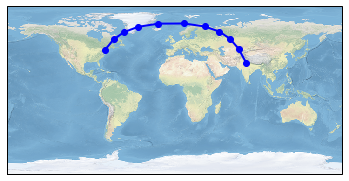

In [32]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )

# plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
#          color='gray', linestyle='--',
#          transform=ccrs.PlateCarree(),
#          )

# plt.text(ny_lon - 3, ny_lat - 12, 'New York',
#          horizontalalignment='right',
#          transform=ccrs.Geodetic())

# plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
#          horizontalalignment='left',
#          transform=ccrs.Geodetic())

plt.show()